# 手書き文字の分類

MNISTのデータは、手書きで書かれた数字を画像にした画像データ(image)と、その画像に書かれた数字を表すラベルデータ(label)から構成されます。

![](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

In [54]:
from sklearn.datasets import fetch_openml
minist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=FalseでDataFrame型ではなくndarray型で読み込む

/Users/yass/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


sklearn.datasetsを通じでMNISTをndarray型でデータが読み込まれます。
- ```data```キーは、インスタンスごと１行、特徴量ごとに1列という形の配列を格納する
- ```label``` キーは、ラベルの配列を格納する

In [55]:
print(minist.data.shape) # (70000, 784) 70000枚の画像データ、1枚あたり28×28=784の画素データ
print(minist.target.shape) # (70000,) 70000枚の画像データに対応するラベルデータ

(70000, 784)
(70000,)


つまり、70000個の画像データがあり、個々の画像には784個の特徴量があります。

各画像が$28 \times 28$ピクセルで、 個々の特徴量は$0$(白)から255(黒)までの値でピクセルの明度を表しています。

以下は、$0$番目のインスタンスの特徴量ベクトルを取り出して、$28 \times 28$配列の形に変換し、可視化すると、$5$のように見える数字が確認できます。

対応する$0$番目のラベルデータを確認すると、ラベルは$5$であることがわかりました。

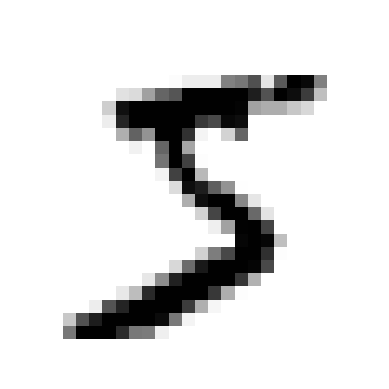

In [56]:
import matplotlib.pyplot as plt

some_digit = minist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [57]:
# 対応するラベルデータ
minist.target[0] # 5

'5'

MNISTデータを用いて、手書き数字を識別機械学習モデルを構築、評価しなさい。

# 回答

In [58]:
# 以上、MNIST、matplotlibが使用できることを確認した。
# mnist.data：行列（画像）
# mnist.target：ラベル（文字）

# 以下に、ロジスティック回帰により、手書き数字を識別するモデルを構築する。

In [59]:
# まず、ロジスティック回帰のためのデータ成形を行う。

# train_test_splitをインポートする。
from sklearn.model_selection import train_test_split

# MNISTデータの成形を行う。
X_train, X_test, y_train, y_test = train_test_split(minist.data / 255, # 画像データの行列の各値を[0,1]の範囲にする。
                                                        minist.target.astype('int64'), # 文字データの各値を数値にする。
                                                        stratify = minist.target, # target(0-10)について、それぞれ同じ割合で学習する。
                                                        random_state = 0 # ランダム値を生成しない。
                                                        )

# trainデータ、testデータの大きさをそれぞれ確認する。
print(f'X_train の長さ: {len(X_train)}')
print(f'X_test の長さ: {len(X_test)}')

X_train の長さ: 52500
X_test の長さ: 17500


In [60]:
# 次に、ロジスティック回帰をし、モデルを構築する。

# sklearnのロジスティック回帰をインポートする。
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルを構築する。
minist_logistic = LogisticRegression() # インスタンスを作成
minist_logistic.fit(X_train, y_train) # fit method...ロジスティック回帰モデルの重みづけを行う

/Users/yass/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# 最後に、以上に構築したモデルを評価する。

# 正答率を評価するaccuracy_scoreをインポートする。
from sklearn.metrics import accuracy_score

# X_testにminisi_logisticを適用したものをpredデータとする。
y_pred = minist_logistic.predict(X_test)

# predデータとtrueデータ（y_test）を比較し、accuracy_scoreを算出する。
print('accuracy_score:', accuracy_score(y_true = y_test, y_pred = y_pred)) # 正しいデータy_testと、検証するデータy_predとする。

accuracy_score: 0.9241714285714285
